<a href="https://colab.research.google.com/github/yx2489/NYU_Integrated_Marketing/blob/main/Hotel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
import pandas as pd
import numpy as np

In [153]:
pip install pingouin

In [154]:
df = pd.read_csv('https://raw.githubusercontent.com/yx2489/NYU_Integrated_Marketing/main/housing.csv')
df=df.dropna()
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [155]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

# Correlation


In [156]:
# install the software
import pingouin as pg

### The pairwise correlation 
https://pingouin-stats.org/generated/pingouin.pairwise_corr.html#pingouin.pairwise_corr

In [157]:
pg.pairwise_corr(df,columns=['housing_median_age', 'median_income'], method='pearson').round(3)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,housing_median_age,median_income,pearson,two-sided,20433,-0.118,"[-0.13, -0.1]",0.014,0.014,-0.119,0.0,2.757e+60,1.0


In [158]:
pg.pairwise_corr(df,columns=['housing_median_age', 'median_income','population'], method='pearson').round(3)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,housing_median_age,median_income,pearson,two-sided,20433,-0.118,"[-0.13, -0.1]",0.014,0.014,-0.119,0.000,2.757e+60,1.000
1,housing_median_age,population,pearson,two-sided,20433,-0.296,"[-0.31, -0.28]",0.087,0.087,-0.305,0.000,inf,1.000
2,median_income,population,pearson,two-sided,20433,0.005,"[-0.01, 0.02]",0.000,-0.000,0.005,0.467,0.011,0.112


### The Partial correlation
https://pingouin-stats.org/generated/pingouin.partial_corr.html#pingouin.partial_corr

In [159]:
# Partial correlation of total_day_calls and number_customer_service_calls controlling for account_length
x='housing_median_age'
y='median_income'
control='population'
pg.partial_corr(data=df, x=x, y=y, covar=control,
                method='pearson').round(3)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,20433,-0.122,"[-0.14, -0.11]",0.015,0.015,0.0,5.435e+64,1.0


# Regression

## Scatterplot
https://seaborn.pydata.org/generated/seaborn.scatterplot.html


In [160]:
#install the package
import seaborn as sns

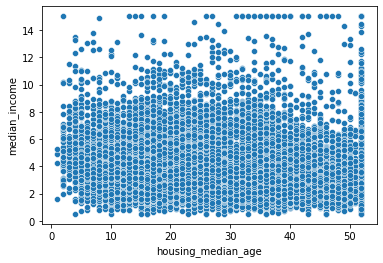

In [161]:
x='housing_median_age'
y='median_income'
sns.scatterplot(data=df, x=x, y=y)

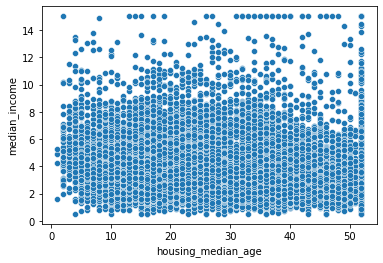

In [162]:
x='housing_median_age'
y='median_income'
sns.scatterplot(data=df, x=x, y=y)

### Regression Result
https://www.statsmodels.org/stable/regression.html

In [163]:
import statsmodels.api as sm

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [165]:
# define the dependent and independent variables
X=df[['housing_median_age','total_rooms']]
y=df['median_income']


In [166]:
# add a constant to the dependent variables
X= sm.add_constant(X)
X.head()

,const,housing_median_age,total_rooms
0,1.0,41.0,880.0
1,1.0,21.0,7099.0
2,1.0,52.0,1467.0
3,1.0,52.0,1274.0
4,1.0,52.0,1627.0


In [167]:
# conduct regression
model = sm.OLS(y, X).fit()

In [168]:
# print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          median_income   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     444.4
Date:                Thu, 03 Dec 2020   Prob (F-statistic):          1.25e-189
Time:                        12:27:04   Log-Likelihood:                -41665.
No. Observations:               20433   AIC:                         8.334e+04
Df Residuals:                   20430   BIC:                         8.336e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.6952      0

### Check assumptions

In [169]:
### get the residuals
predictions = model.predict(X)
residuals =y-predictions
df_res=pd.DataFrame({'Residual': residuals, 'Prediction': predictions})
df_res.head()

,Residual,Prediction
0,4.827040,3.498160
1,3.676094,4.625306
2,3.757686,3.499714
3,2.173317,3.469783
4,0.321673,3.524527


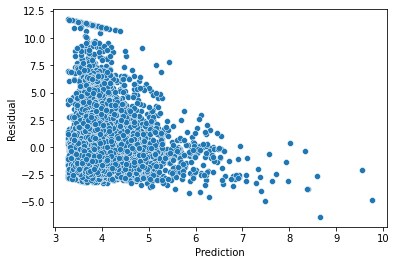

In [170]:
#print the scatter plot between residuals and predicitions
x='Prediction'
y='Residual'
sns.scatterplot(data=df_res, x=x, y=y)

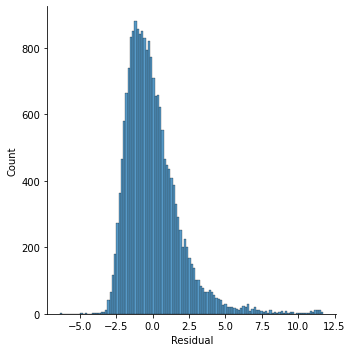

In [171]:
# histogram of the residual
sns.displot(df_res, x="Residual")

In [172]:
x=df_res['Residual']
pg.normality(x)

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,W,pval,normal
Residual,0.88619,0.0,False


In [173]:
pg.pairwise_corr(df,columns=['housing_median_age','median_income'], method='pearson').round(3)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,housing_median_age,median_income,pearson,two-sided,20433,-0.118,"[-0.13, -0.1]",0.014,0.014,-0.119,0.0,2.757e+60,1.0


#Logit Analysis

In [174]:
df['ocean_proximity'] = df['ocean_proximity'].apply(lambda x: 1 if x =='yes' else 0)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0


In [175]:
y=df['ocean_proximity']
X=df[['housing_median_age','total_rooms','total_bedrooms']]

In [176]:
# add a constant to the dependent variables
X= sm.add_constant(X)
X.head()

,const,housing_median_age,total_rooms,total_bedrooms
0,1.0,41.0,880.0,129.0
1,1.0,21.0,7099.0,1106.0
2,1.0,52.0,1467.0,190.0
3,1.0,52.0,1274.0,235.0
4,1.0,52.0,1627.0,280.0


In [177]:
# conduct regression
logit_model = sm.Logit(y, X).fit()

PerfectSeparationError: ignored

In [ ]:
# print model summary
print(model.summary())

In [ ]:
### get the odds ratio
np.exp(logit_model.params)

In [ ]:
### get the predictions 
pred_prob = logit_model.predict(X)
df_result=pd.DataFrame({'Pred_prob': pred_prob,'y':y})
df_result['Prediction']=df_result['Pred_prob'].apply(lambda x: 1 if x >=0.5 else 0)
df_result.head()

In [ ]:
from sklearn.metrics import accuracy_score
Prediction = df_result['Prediction']
accuracy_score(y, Prediction)

# Cross Validation

In [ ]:
## get the train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
# conduct regression
logit_model = sm.Logit(y_train, X_train).fit()

In [ ]:
# print model summary
print(logit_model.summary())

In [ ]:
### get the predictions on the test data
pred_prob = logit_model.predict(X_test)
df_test=pd.DataFrame({'Pred_prob': pred_prob,'y_test':y_test})
df_test['Prediction']=df_test['Pred_prob'].apply(lambda x: 1 if x >=0.5 else 0)
df_test.head()

In [ ]:
from sklearn.metrics import accuracy_score
Prediction =df_test['Prediction']
accuracy_score(y_test, Prediction)

### draw confusion matrix
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [ ]:
from sklearn.metrics import confusion_matrix
confmtrx = np.array(confusion_matrix(y_test, Prediction))
pd.DataFrame(confmtrx, index=['Non-Churn','Churn'],
columns=['predicted_Non_Churn', 'predicted_Churn'])

#Calculate the F1 score
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, Prediction)

# Cross validation for multiple times

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
scores = cross_val_score(log_reg, X, y, cv=10)
print('Cross-Validation Accuracy Scores', scores)

In [ ]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

# Appendix

In [ ]:
Z =np.linspace(-100,100,10000)
P=np.exp(Z)/(1+np.exp(Z))
import plotly.express as px
fig = px.scatter(x=Z, y=P)
fig.show()